# Time Series Forecasting


## Objective:
-  Employment of various machine learning methods such as traditional and advanced methods for stock price forecasting

## About the Data:
- There are multiple variables in the dataset:
  date, open, high, low, last, close, total_trade_quantity, and turnover.
- This dataset contains data from 2010-07-21 to 2018-09-28.
- The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
- High, Low and Last represent the maximum, minimum, and last price of the share for the day.
- Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.
- In this work, our focus is on the Open column and time column as index of the dataframe. 

- Relative information about the data can be found here:
https://www.kaggle.com/datasets/akshaydattatraykhare/nsetataglobal


## 1. Traditional Forecasting
- Two ARIMA and Exponential models of traditional forecasting are used for the purpose of this work. 

### 1-1: Autoregressive Integrated Moving Average (ARIMA)

- ARIMA is a widely used model for time series forecasting. It combines autoregressive (AR) and moving average (MA) components with differencing to handle trends and seasonality in the data. The ARIMA model captures the dependencies between previous observations and the current observation to make predictions. It requires specifying the order of the AR, I, and MA components.
- Among various forecasting techniques, a very powerful and widely used model is ARIMA (Autoregressive Integrated Moving Average). It is suitable for predicting the linear dependencies and patterns in stationary time series data. It has been made of 3 main components of Autoregressive, Integrated and Moving Average. Autoregressive component is based on the fact that the future data is dependent on its past value. The Integrated accounts for non-stationarity of data by differing the series to make it stationary. Moving Average explains the short-term fluctuations or noise in the data. The ARIMA model combines the three components to forecast the future data using the trend observed in the previous data. The ARIMA model is versatile and is used for a wide range of time series forecasting such as economic forecasting, and demand forecasting.

### 1-2: ETS (Error-Trend-Seasonality) or (Exponential Seasonality)

- "Error-Trend-Seasonality" (ETS) is another popular method used for time series forecasting, particularly in the realm of business forecasting and econometrics. ETS models decompose a time series into three components: error, trend, and seasonality.


### General Forecasting Process of Traditional Models:

* Visualiza the time series data
* Make the time series data stationary
* Plot the Correlation and Auto Correlation charts
* Construct the ARIMA Model and ETS Model on the data
* Use the model to make the prediction (fine p and q values)
* Plot the real values and predicted values
* Find the squared errors



## 2. Advanced Forecasting

### 2-1: Long Short Term Model (LSTM) 

- Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) that are well-suited to time series forecasting due to their ability to learn long-term dependencies. LSTMs are particularly effective for datasets where the temporal order and lag relationships are critical, such as in weather forecasting, stock prices, and many other sequential data problems.
- Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) model developed due to the vanishing gradient problem in traditional RNNs. LSTM method is used to capture long term dependencies and non-linear patterns in the data. LSTM models are trained according to backpropagation through time which reduces the vanishing gradient problem to optimize the network parameters. 
- LSTM networks contain memory cells that allow them to retain information over time. Each LSTM cell has 3 gates as forget gate, input gate and output gate. Through forget gate, it will forget unimportant information since it determines which information is considered as important information. In the input gate new information will be added to the LSTM cell. The output gate also provides us with the final prediction of model. LSTM can be successfully directed for multivariate time series forecasting. Due to its liability to retain the information over long sequence of data, it is of most importance for larger and more complex data.

### 2-2:  Gated Recurrent Unit (GRU) Model

- LSTM model is particularly applicable for time series forecasting including stock market forecasting. However, they require a large amount of data and can be computationally very expensive to use. Gated Recurrent Unit (GRU) is a type of RNNs and simpler variation of LSTM model with simpler architecture aimed to decrease the computational complexity and memory requirements of LSTM networks. GRU network contains fewer parameters and update gate and reset gate. The flow of information is controlled through how much of the previously hidden information to keep and how much new information to include. Thus, the combination of input and forget gate from LSTM has been converted into one update gate. Despite its similarities to LSTM, GRU is demonstrated to achieve similar performance as LSTM.


### General Forecasting Process of Advanced Forecasting (LSTM) Models:
* Before machine learning can be used, time series forecasting problems must be re-framed as supervised learning problems. From a sequence to pairs of input and output sequences. 
* After preparing data, data is split into train and test 
* train data is used for training the model
* test data is used for forecasting
* The results are summarized in a plot and mean squared error values

## Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
warnings.filterwarnings('ignore')
sns.set()

## Import Data 

In [2]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
# Date is object type. using a method in ython we can convert it to datetime type.
df["Date"] = pd.to_datetime(df['Date'])
# Set "Date" column as index
df.set_index('Date', inplace = True) 
# Let's delete all the columns and keep onlu "Open" column
del df["High"]
del df["Low"]
del df["Last"]
del df["Close"]
del df["Total Trade Quantity"]
del df["Turnover (Lacs)"]
# convert the time series to business days frequencies using df.asfreq("b")
df = df.asfreq("b")
# Forward fill the null values
df = df.fillna(method="ffill")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-07-21 to 2018-09-28
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


## Visualization of Time Series Data

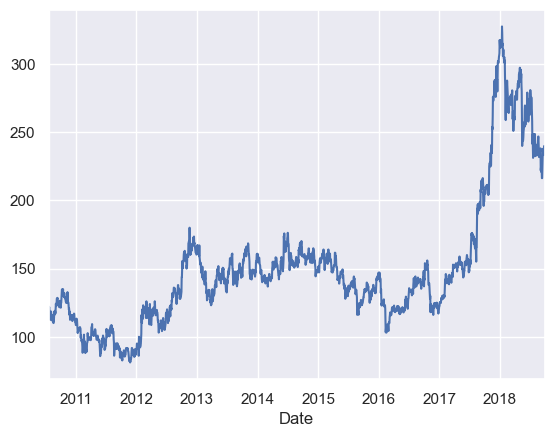

In [7]:
df["Open"].plot()
plt.show()

## Test Stationarity of Data

- The augmented Dickey-Fuller (ADF) test is a statistical method used in Python to determine stationary of a time series

In [8]:
adfuller(df.Open) 

(-1.0924936738864948,
 0.7180560392090127,
 1,
 2136,
 {'1%': -3.4334151573147094,
  '5%': -2.8628940688135,
  '10%': -2.5674908403908736},
 11241.089787549532)

In [9]:
# p-value = 0.718> 0.05, so we can say the df['Open'] is non-stationary.

## Differencing 
- In order to use ARIMA forecasting, the Non-Stationary data needs to be transformed into Stationary data

In [10]:
# We can transform data to stationary data using shift() method
df["Open_first_difference"] = df["Open"] - df["Open"].shift(1)

In [11]:
df.head()

,Open,Open_first_difference
Date,,
2010-07-21,122.1,NaN
2010-07-22,120.3,-1.8
2010-07-23,121.8,1.5
2010-07-26,120.1,-1.7
2010-07-27,117.6,-2.5


In [12]:
# Stationarity test of shifted data:
adfuller(df.Open_first_difference[1:])
# Now our data is stationary: p-value = 0 < 0.05

(-49.92089674332966,
 0.0,
 0,
 2136,
 {'1%': -3.4334151573147094,
  '5%': -2.8628940688135,
  '10%': -2.5674908403908736},
 11235.911869191923)

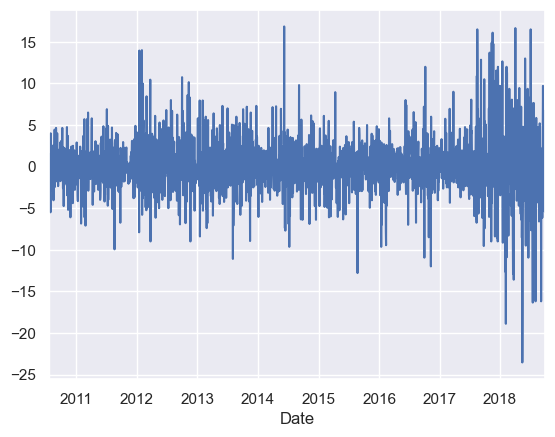

In [13]:
df["Open_first_difference"].plot()
plt.show()

## ACF/PACF plots

- In ARIMA we are looking for p, d, q values which can be determined as follow:
- Identification of p value from AR model is often best done with PACF plots
- The number of non-zero partial autocorrelations gives the order of the AR model.
- Identification of q value from MA model is often best done with the ACF rather than the PACF plots. 
- The number of non-zero autocorrelation provides us with the order of MA model. 

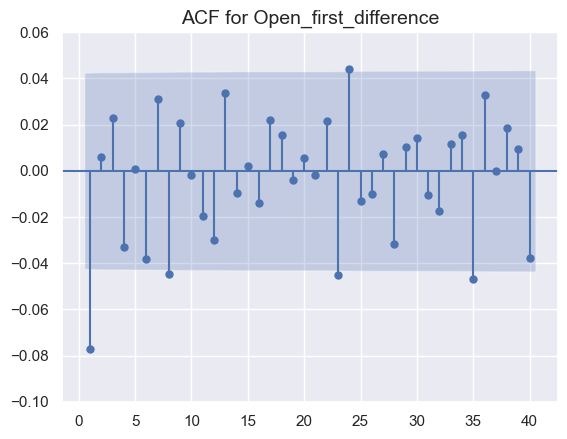

In [14]:
sgt.plot_acf(df.Open_first_difference.iloc[1:], zero = False, lags=40)
plt.title("ACF for Open_first_difference", size=14)
plt.ylim(-0.1, 0.06)
plt.show()

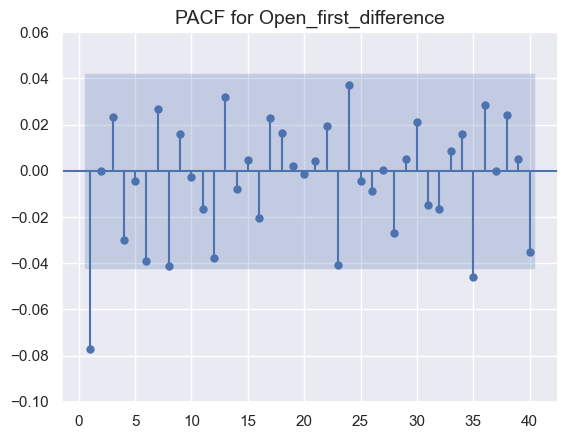

In [15]:
sgt.plot_pacf(df.Open_first_difference.iloc[1:], zero = False, lags=40)
plt.title("PACF for Open_first_difference", size=14)
plt.ylim(-0.1, 0.06)
plt.show()

In [16]:
from pmdarima import auto_arima
model = auto_arima(df["Open"], m=5, trace=True, njobs=-1)
print(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=11363.646, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=11377.394, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=11368.524, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=11368.642, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=11375.883, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=11362.190, Time=2.45 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=11363.199, Time=1.30 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=11363.813, Time=3.43 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=11362.099, Time=2.02 sec
 ARIMA(2,1,2)(2,0,0)[5] intercept   : AIC=11363.783, Time=2.89 sec
 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=11365.785, Time=4.29 sec
 ARIMA(1,1,2)(1,0,0)[5] intercept   : AIC=11366.084, Time=1.44 sec
 ARIMA(2,1,1)(1,0,0)[5] intercept   : AIC=11372.523, Time=0.42 sec
 ARIMA(3,1,2)(1,0,0)[5] intercept   : AIC=11368.466, Time=1.04 sec
 ARIMA(2,1,3)(1,0,0

### ARIMA(p,d,q) q=1,d=1,p=1
- p is the AR model lag
- d is differencing
- q is the MA lags

In [17]:
# ARIMA modeling and fitting on shifted stationary data
model = ARIMA(df.Open_first_difference.iloc[1:], order=(2,1,3))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Open_first_difference   No. Observations:                 2137
Model:                    ARIMA(2, 1, 3)   Log Likelihood               -5677.895
Date:                   Tue, 11 Jun 2024   AIC                          11367.789
Time:                           15:46:28   BIC                          11401.790
Sample:                       07-22-2010   HQIC                         11380.232
                            - 09-28-2018                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1556      0.144     -8.052      0.000      -1.437      -0.874
ar.L2         -0.2972      0.140     -2.120      0.034      -0.572      -0.022
ma.L1          0.0766      0.170      0.451      0.652      -0.256       0.409
ma.L2         -0.8790      0.096     -9.186      0.000      -1.067      -0.691
ma.L3         -0.1975      0.142     -1.388      0.165      -0.476       0.081
sigma2        11.7191      0.883     13.273      0.000       9.989      13.450
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2538.46
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
df.head()

,Open,Open_first_difference
Date,,
2010-07-21,122.1,NaN
2010-07-22,120.3,-1.8
2010-07-23,121.8,1.5
2010-07-26,120.1,-1.7
2010-07-27,117.6,-2.5


### Train/Test Split dataset

In [19]:
# Let's divide data into train and test set with 80:20 split
size = int(len(df)*0.80)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [20]:
df_train.tail()
df_test.tail()

,Open,Open_first_difference
Date,,
2018-09-24,233.55,-1.45
2018-09-25,233.30,-0.25
2018-09-26,240.00,6.70
2018-09-27,234.55,-5.45
2018-09-28,234.05,-0.50


### ARIMA (AutoRegressive Integrated Moving Average)
- RIMA, short for AutoRegressive Integrated Moving Average, is a popular statistical method used for time series forecasting. It's a combination of three components: autoregression (AR), differencing (I), and moving average (MA).

- ARIMA models are typically denoted as ARIMA(p, d, q), where:
    p is the order of the autoregressive component.
    d is the degree of differencing (the number of times the data have had past values subtracted).
    q is the order of the moving average component.

- ARIMA is widely used in various fields for forecasting time series data, such as finance, economics, and meteorology. However, it has certain limitations, such as its assumption of linearity and stationarity, which may not always hold in real-world data.

In [21]:
start_date = '2017-02-08'
end_date = '2018-09-28'

In [22]:
model = ARIMA(df_train.Open.iloc[1:], order=(2,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start = start_date, end = end_date)

In [23]:
df_test.head()

,Open,Open_first_difference
Date,,
2017-02-08,141.95,-0.15
2017-02-09,146.00,4.05
2017-02-10,143.95,-2.05
2017-02-13,144.90,0.95
2017-02-14,142.40,-2.50


In [24]:
df_test['Predictions_ARIMA'] = prediction
df_test.head()

,Open,Open_first_difference,Predictions_ARIMA
Date,,,
2017-02-08,141.95,-0.15,142.328107
2017-02-09,146.00,4.05,141.994161
2017-02-10,143.95,-2.05,142.334153
2017-02-13,144.90,0.95,141.996093
2017-02-14,142.40,-2.50,142.324414


<Axes: xlabel='Date'>

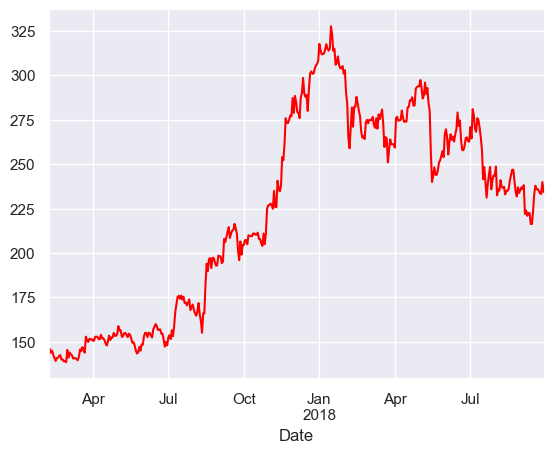

In [25]:
df_test['Open'].plot( color = 'red')

<Axes: xlabel='Date'>

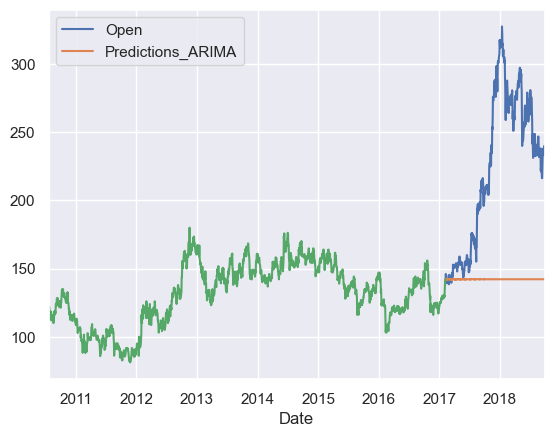

In [26]:
df_test[['Open', 'Predictions_ARIMA']].plot()
df_train['Open'].plot()

- ARIMA is not a good model for our timeseries dataset

### ETS (Error-Trend-Seasonality) or (Exponential Seasonality)
- "Error-Trend-Seasonality" (ETS) is another popular method used for time series forecasting, particularly in the realm of business forecasting and econometrics. ETS models decompose a time series into three components: error, trend, and seasonality.

In [27]:
start_date = '2017-02-08'
end_date = '2018-09-28'

model_ETS_add = ExponentialSmoothing(df_train.Open.iloc[1:], trend='add', seasonal='add', seasonal_periods=5)
result_ETS_add = model_ETS_add.fit()

df_test['Predicted_ETS_add'] = result_ETS_add.forecast(steps=len(df_test))

df_test.head()

,Open,Open_first_difference,Predictions_ARIMA,Predicted_ETS_add
Date,,,,
2017-02-08,141.95,-0.15,142.328107,142.119908
2017-02-09,146.00,4.05,141.994161,142.183481
2017-02-10,143.95,-2.05,142.334153,142.003884
2017-02-13,144.90,0.95,141.996093,142.114317
2017-02-14,142.40,-2.50,142.324414,142.108562


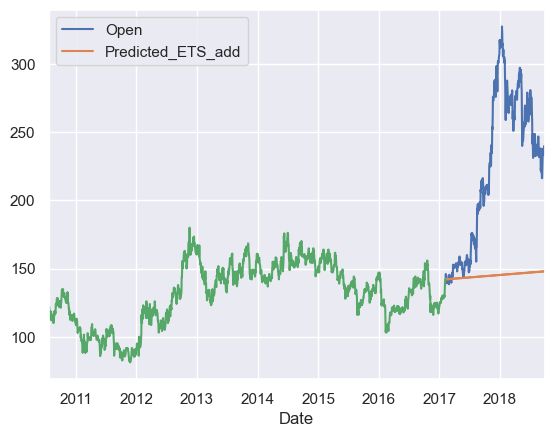

In [28]:
df_test[['Open', 'Predicted_ETS_add']].plot()
df_train['Open'].plot()
plt.show()

In [29]:
start_date = '2017-02-08'
end_date = '2018-09-28'

model_ETS_add = ExponentialSmoothing(df_train.Open.iloc[1:], trend='mul', seasonal='mul', seasonal_periods=5)
result_ETS_add = model_ETS_add.fit()

df_test['Predicted_ETS_mul'] = result_ETS_add.forecast(steps=len(df_test))

df_test.head()

,Open,Open_first_difference,Predictions_ARIMA,Predicted_ETS_add,Predicted_ETS_mul
Date,,,,,
2017-02-08,141.95,-0.15,142.328107,142.119908,142.063849
2017-02-09,146.00,4.05,141.994161,142.183481,142.115288
2017-02-10,143.95,-2.05,142.334153,142.003884,141.914681
2017-02-13,144.90,0.95,141.996093,142.114317,142.022960
2017-02-14,142.40,-2.50,142.324414,142.108562,141.976378


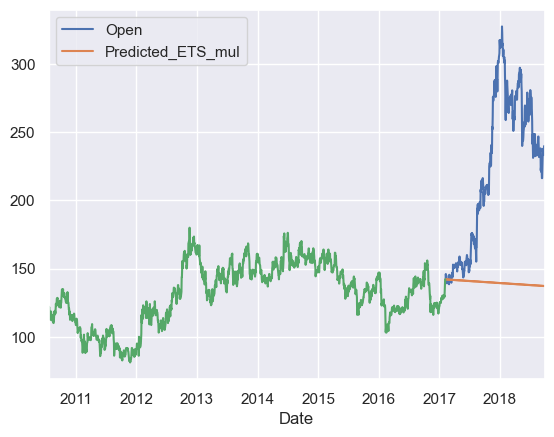

In [30]:
df_test[['Open', 'Predicted_ETS_mul']].plot()
df_train['Open'].plot()
plt.show()

### Forecasting Accuracy Evaluation:
- ETS_Additive, ETS_Multiplicative, ARIMA

In [31]:
mse_ETS_mul = mean_squared_error(df_test['Open'], df_test['Predicted_ETS_mul'])

In [32]:
mse_ETS_add = mean_squared_error(df_test['Open'], df_test['Predicted_ETS_add'])

In [33]:
mse_ARIMA = mean_squared_error(df_test['Open'], df_test['Predictions_ARIMA'])

In [34]:
print("Forecast Accuracy of ARIMA: \t mse = ", mse_ARIMA)
print("Forecast Accuracy of ETS_Additive: \t mse = ", mse_ETS_add)
print("Forecast Accuracy of ETS_Multiplicative: \t mse = ", mse_ETS_mul)

Forecast Accuracy of ARIMA: 	 mse =  9641.252635963205
Forecast Accuracy of ETS_Additive: 	 mse =  9044.886196737034
Forecast Accuracy of ETS_Multiplicative: 	 mse =  10184.497448775615


## ARIMA & ETS
- ARIMA & ETS are not an appropriate model for stock market forecasting due to the complex nature and fluctuations of these type of datasets.
- Large value of error is observed for both ARIMA and Exonential Smooting (ETS) models
- More complex models might be investigated for stock-market prediction 

# LSTM Modeling

In [35]:
df_lstm = df['Open']

In [36]:
def prepare_data(df, step):
    df_as_numpy = df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_numpy)-step):
        rows = [[a] for a in df_as_numpy[i:i+step]]
        x.append(rows)
        label = df_as_numpy[i+step]
        y.append(label)
    return np.array(x), np.array(y)

In [37]:
x1, y1 = prepare_data(df_lstm, 2)

In [38]:
def train_test_data(x, y, df):
    train = int(len(x)*0.8)
    test = int(len(x))

    x_train, y_train = x[:train], y[:train]
    x_test, y_test = x[train:test], y[train:test]

    dates_train = df[0:train]
    dates_test = df[train:test]
    
    return x_train, y_train, x_test, y_test

In [39]:
x_train1, y_train1, x_test1, y_test1 = train_test_data(x1, y1, df_lstm)

In [40]:
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((1708, 2, 1), (1708,), (428, 2, 1), (428,))

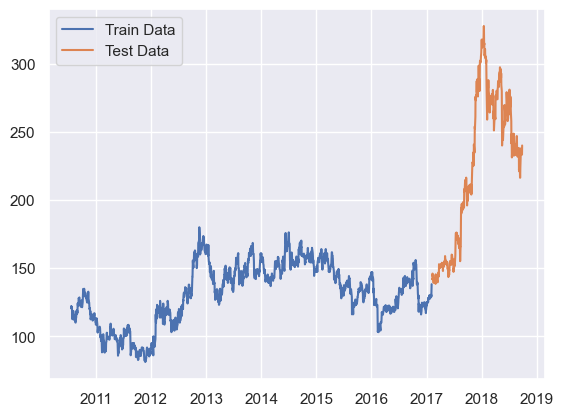

In [41]:
def plot_train_test(x, df):
    a = int(len(x1)*0.8)
    b = int(len(x1))
    df_lstm_train = df_lstm[0:a]
    df_lstm_test = df_lstm[a:b]
    plt.plot(df_lstm_train)
    plt.plot(df_lstm_test) 
    plt.legend(['Train Data', 'Test Data'])
    
plot_train_test = plot_train_test(x1, df_lstm)

In [42]:
def model_LSTM(x_train, y_train):
    model = Sequential()
    model.add(LSTM(units = 100, activation='relu', input_shape=(2,1)))
    model.add(Dense(1)) 
    model.compile(loss='mse',
                   optimizer='adam')
    model.fit(x_train, y_train, epochs=25)
    return model

In [43]:
model_lstm = model_LSTM(x_train1, y_train1)



Epoch 1/25

54/54 [==============================] - 1s 2ms/step - loss: 6438.0049
Epoch 2/25
54/54 [==============================] - 0s 2ms/step - loss: 20.9388
Epoch 3/25
54/54 [==============================] - 0s 2ms/step - loss: 10.5148
Epoch 4/25
54/54 [==============================] - 0s 2ms/step - loss: 10.3776
Epoch 5/25
54/54 [==============================] - 0s 2ms/step - loss: 10.1992
Epoch 6/25
54/54 [==============================] - 0s 2ms/step - loss: 10.0799
Epoch 7/25
54/54 [==============================] - 0s 2ms/step - loss: 10.0372
Epoch 8/25
54/54 [==============================] - 0s 5ms/step - loss: 9.8460
Epoch 9/25
54/54 [==============================] - 0s 2ms/step - loss: 10.0180
Epoch 10/25
54/54 [==============================] - 0s 2ms/step - loss: 9.9091
Epoch 11/25
54/54 [==============================] - 0s 2ms/step - loss: 9.9327
Epoch 12/25
54/54 [==============================] - 0s 2ms/step - loss: 10.0731
Epoch 13/25
54/54 [================

In [44]:
a = int(len(x1)*0.8)
b = int(len(x1))
df_lstm_train = df_lstm[0:a]
df_lstm_test = df_lstm[a:b]

14/14 [==============================] - 0s 622us/step


(37.308627020702836, 4.205763351583035, 0.018383401460580335)

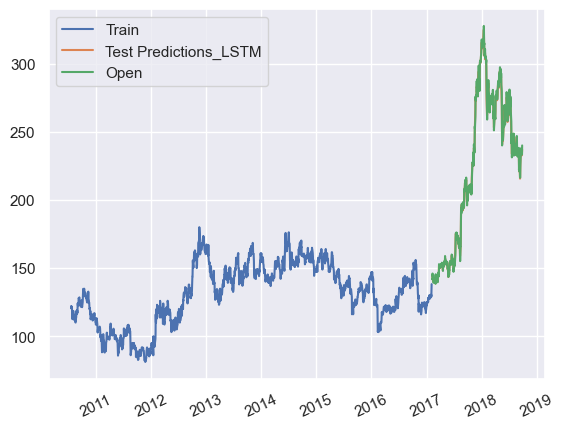

In [45]:
def plot_test_prediction(model, x, y):
    test_predictions = model.predict(x).flatten()
    #test_results = pd.DataFrame(data={'Test Predictions_LSTM':test_predictions, 'Open':y})
    plt.plot(df_lstm_train)
    plt.plot(df_lstm_test.index, test_predictions)
    plt.plot(df_lstm_test.index, df_lstm_test)
    plt.legend(['Train', 'Test Predictions_LSTM', 'Open'])
    plt.xticks(rotation = 25)
    mse = mean_squared_error(y, test_predictions)
    mae = mean_absolute_error(y, test_predictions)
    mape = mean_absolute_percentage_error(y, test_predictions)
    return mse, mae, mape  


plot_test_prediction(model_lstm, x_test1, y_test1)

In [46]:
def plot_train_test_prediction(model, df_lstm_train, df_lstm_test, x, ytrain, ytest):
    test_predictions = model.predict(x).flatten()
    plt.plot(df_lstm_train.index, ytrain)
    plt.plot(df_lstm_test.index, test_predictions)
    plt.plot(df_lstm_test.index, ytest)
    plt.legend(['Open rain', 'Test Predictions_GRU', 'Open Test'])

14/14 [==============================] - 0s 781us/step


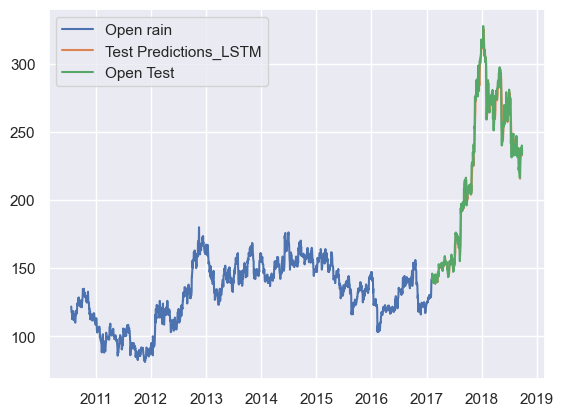

In [47]:
plot_train_test_prediction(model_lstm, df_lstm_train, df_lstm_test, x_test1, y_train1, y_test1)

# Gated Recurrent Unit (GRU) Model
- Since we have he data prepared, we only need to do the model training and then prediction and plotting. 

In [48]:
def GRU_model(x_train, y_train, x_test):
    model = Sequential()
    model.add(GRU(units = 64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1)) 
    model.compile(loss='mse',
                   optimizer='adam',
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, epochs=10)    
    
    return model

In [49]:
gru_model = GRU_model(x_train1, y_train1, x_test1)

Epoch 1/10

54/54 [==============================] - 1s 1ms/step - loss: 13719.4756 - mean_absolute_error: 113.3537
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 253.5429 - mean_absolute_error: 10.0438
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 9.6960 - mean_absolute_error: 2.3098
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 9.1492 - mean_absolute_error: 2.2156
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 9.1511 - mean_absolute_error: 2.2258
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 9.1160 - mean_absolute_error: 2.2117
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 9.1150 - mean_absolute_error: 2.2189
Epoch 8/10
54/54 [==============================] - 0s 1ms/step - loss: 9.1422 - mean_absolute_error: 2.2206
Epoch 9/10
54/54 [==============================] - 0s 1ms/step - loss: 9.1576 - mean_absolute_error: 2.2167
Epoch 10/

14/14 [==============================] - 0s 617us/step


(34.060353096376154, 4.026193073308356, 0.017667553177453867)

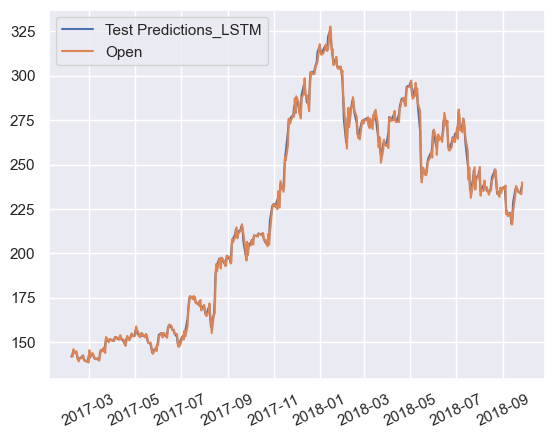

In [50]:
def plot_test_prediction(model, x, y):
    test_predictions = model.predict(x).flatten()
    #test_results = pd.DataFrame(data={'Test Predictions_LSTM':test_predictions, 'Open':y})
    plt.plot(df_lstm_test.index, test_predictions)
    plt.plot(df_lstm_test.index, df_lstm_test)
    plt.legend(['Test Predictions_GRU', 'Open'])
    plt.xticks(rotation = 25)
    mse = mean_squared_error(y, test_predictions)
    mae = mean_absolute_error(y, test_predictions)
    mape = mean_absolute_percentage_error(y, test_predictions)
    return mse, mae, mape  


plot_test_prediction(gru_model, x_test1, y_test1)

In [51]:
def plot_train_test_prediction(model, df_lstm_train, df_lstm_test, x, ytrain, ytest):
    test_predictions = model.predict(x).flatten()
    plt.plot(df_lstm_train.index, ytrain)
    plt.plot(df_lstm_test.index, test_predictions)
    plt.plot(df_lstm_test.index, ytest)
    plt.legend(['Passenge rain', 'Test Predictions_GRU', 'Open Test'])

14/14 [==============================] - 0s 1ms/step


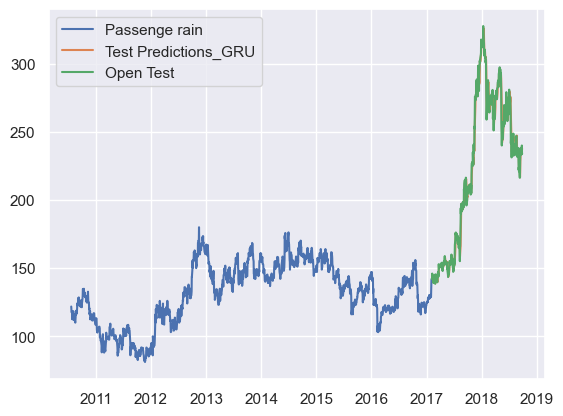

In [52]:
plot_train_test_prediction(gru_model, df_lstm_train, df_lstm_test, x_test1, y_train1, y_test1)

# Conclusion

- As compared with ARIMA and ES(Exponential Smoothing), a great prediction is observed using LSTM and GRU models of neural networks. 
- Mean Squared Error is the lowest amount for GRU and LSTM models and is respectively equal to 33.19 and 42.89.
- Lowest MSE is observed for GRU model. 
- Mean Squared Error is incresaing significantly in ARIMA and Exponential Smoothing models. 
- Squared Error is equal to 9641.25, 9044.89 and 10184.5 respectively for ARIMA, ETS_multiplicative and ETS_additive models.  